In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import math as mt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


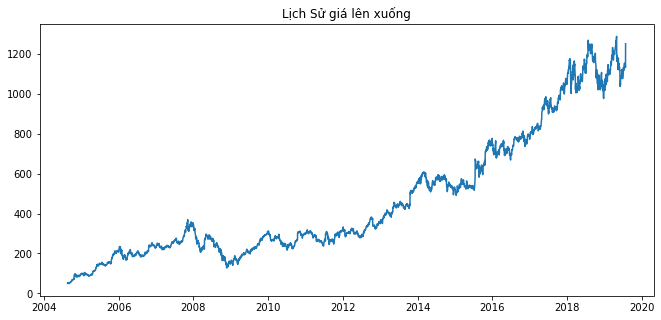

In [13]:
df = pd.read_csv('Google.csv')
df.Date = df['Date'].astype('datetime64[ns]')
df.set_index('Date', inplace=True)
plt.figure(figsize=(11,5))
plt.plot(df['Close'])
plt.title('Lịch Sử giá lên xuống')
plt.show()


In [14]:
# tạo một biến gọi là forecast_out, để lưu trữ số ngày để dự đoán trong tương lai
forecast_out = 65

df['Prediction'] = df[['Close']].shift(-1)

# Tạo X dữ liệu độc lập
X = np.array(df.drop(['Prediction'], axis=1))

# xoá 15 của forecast ra khỏi X
X = X[:-forecast_out]
print(f'giá trị x: {X}')
# tạo biến phục thuộc y
y = np.array(df['Prediction'])

# Nhận tất cả các giá trị y ngoại trừ hàng 15 cuối cùng
y = y[:-forecast_out]
print(f'giá trị y :{y}')

giá trị x: [[4.98132860e+01 5.18357090e+01 4.78008310e+01 4.99826550e+01
  4.99826550e+01 4.48713000e+07]
 [5.03164020e+01 5.43363340e+01 5.00623550e+01 5.39527700e+01
  5.39527700e+01 2.29428000e+07]
 [5.51682170e+01 5.65281180e+01 5.43213880e+01 5.44957350e+01
  5.44957350e+01 1.83428000e+07]
 ...
 [1.23598999e+03 1.24908997e+03 1.22831006e+03 1.24883997e+03
  1.24883997e+03 8.07300000e+05]
 [1.25068994e+03 1.26900000e+03 1.24638000e+03 1.26455005e+03
  1.26455005e+03 1.31990000e+06]
 [1.26412000e+03 1.26801001e+03 1.25500000e+03 1.25600000e+03
  1.25600000e+03 1.01880000e+06]]
giá trị y :[  53.95277    54.495735   52.239193 ... 1264.550049 1256.
 1263.449951]


In [15]:
split_percentage = 0.8
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = y[:split]

X_test = X[split:]
Y_test = y[split:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3008, 6)
(3008,)
(687, 6)
(687,)


In [16]:
#dùng modun có sẵn
model= LinearRegression()
# Train the model
model.fit(X_train, Y_train)
lr_confidence = model.score(X_test, Y_test)
print("tỉ lệ dự đoán: ", lr_confidence)

tỉ lệ dự đoán:  0.9906622140965791


In [17]:
x_forecast = np.array(df.drop(['Prediction'], axis=1))[-forecast_out:]
x_forecast

array([[1.26477002e+03, 1.26740796e+03, 1.25203003e+03, 1.26344995e+03,
        1.26344995e+03, 1.10730000e+06],
       [1.26900000e+03, 1.27306995e+03, 1.26031995e+03, 1.27218005e+03,
        1.27218005e+03, 1.24140000e+06],
       [1.27400000e+03, 1.28927002e+03, 1.26629504e+03, 1.28757996e+03,
        1.28757996e+03, 2.49940000e+06],
       [1.18500000e+03, 1.19281006e+03, 1.17500000e+03, 1.18847998e+03,
        1.18847998e+03, 6.20700000e+06],
       [1.18805005e+03, 1.18805005e+03, 1.16718005e+03, 1.16807996e+03,
        1.16807996e+03, 2.63920000e+06],
       [1.16776001e+03, 1.17418994e+03, 1.15500195e+03, 1.16260999e+03,
        1.16260999e+03, 1.94480000e+06],
       [1.17365002e+03, 1.18680005e+03, 1.16900000e+03, 1.18540002e+03,
        1.18540002e+03, 1.98070000e+06],
       [1.16626001e+03, 1.19084998e+03, 1.16626001e+03, 1.18939001e+03,
        1.18939001e+03, 1.56390000e+06],
       [1.18046997e+03, 1.19043994e+03, 1.16104004e+03, 1.17409998e+03,
        1.17409998e+03, 

In [18]:
#dùng hồi quy để dự đoán
lr_prediction = model.predict(x_forecast)
print("dự đoán trong 65: ", lr_prediction)

dự đoán trong 65:  [1262.84602301 1271.81878186 1287.00357295 1188.17404978 1168.46525375
 1162.92226546 1185.37490127 1189.71067607 1173.70175166 1168.14172024
 1162.69129957 1162.33187535 1131.64275533 1121.23967814 1163.74385034
 1180.22415184 1164.1622734  1138.71260039 1149.12830729 1153.05044314
 1140.3911967  1134.11802129 1137.09711106 1115.86667443 1118.95948296
 1105.16501424 1034.17120689 1052.27661255 1040.99700092 1043.6968974
 1066.56434548 1082.40927863 1080.00545671 1076.6698999  1089.62921693
 1086.18700043 1094.12060636 1104.42797525 1101.87029581 1111.05727467
 1122.51581761 1115.98859392 1086.28218594 1079.99123712 1077.10552487
 1081.31651139 1099.3739969  1111.30189154 1122.47975087 1131.97583939
 1116.35332628 1124.87784266 1141.39971991 1145.66410887 1145.36733834
 1150.04025326 1154.81841738 1148.12356181 1145.76013059 1130.91038359
 1137.44215935 1145.07625054 1138.49028457 1131.4169591  1252.11197939]


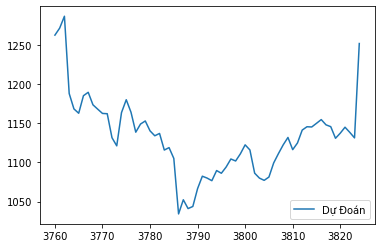

<class 'pandas.core.series.Series'>
Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239193
2004-08-25      52.802086
                 ...     
2019-07-22    1138.069946
2019-07-23    1146.209961
2019-07-24    1137.810059
2019-07-25    1132.119995
2019-07-26    1250.410034
Name: Close, Length: 3760, dtype: float64


In [19]:
list=[i for i in range(len(df['Close']),len(df['Close'])+forecast_out,1)]
plt.plot(list,lr_prediction,label='Dự Đoán')
plt.legend(loc=4)
plt.show()
print(type(df['Prediction']))
print(df['Close'])